In [1]:
import sys
sys.path.append("../")

In [86]:
from CurvyCUSIPs.CurveDataFetcher import CurveDataFetcher
from CurvyCUSIPs.CurveInterpolator import GeneralCurveInterpolator
from CurvyCUSIPs.USTs import USTs
from CurvyCUSIPs.S490Swaps import S490Swaps
from CurvyCUSIPs.S490Swaptions import S490Swaptions

from CurvyCUSIPs.utils.ust_viz import plot_usts
from CurvyCUSIPs.HedgeHog import dv01_neutral_curve_hegde_ratio, beta_estimates
from CurvyCUSIPs.utils.pca_utils import calc_pca_loadings_matrix
from CurvyCUSIPs.utils.rv_utils import cusip_spread_rv_regression
from CurvyCUSIPs.utils.ust_viz import plot_usts
from CurvyCUSIPs.models.calibrate import calibrate_mles_ols, calibrate_nss_ols

import requests
import numpy as np
import QuantLib as ql
import pandas as pd
import scipy.interpolate
import requests
from datetime import datetime
from typing import Dict, List
import ujson as json
import matplotlib.pyplot as plt

import tqdm
import os
from dotenv import dotenv_values
env_path = os.path.join(os.getcwd(), "../.env")
config = dotenv_values(env_path)

import nest_asyncio
nest_asyncio.apply()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
s490_swaps = S490Swaps(s490_curve_db_path=r"..\db\nyclose_sofr_ois")
s490_swaptions = S490Swaptions(s490_swaps, error_verbose=True)

2024-12-22 16:01:19,918 - CurvyCUSIPs.S490Swaptions - INFO - Most recent date in db: 2024-12-20 00:00:00
2024-12-22 16:01:19,924 - CurvyCUSIPs.S490Swaptions - INFO - Most recent date in db: 2024-12-20 00:00:00


In [141]:
date = datetime(2024, 12, 20)
atm_surfaces = s490_swaptions.get_vol_surfaces(date=date, expiry="1M", plot_surfaces=True, use_ploty=True)
atm_df = atm_surfaces[date]

FETCHING VOL TIMESERIES: 100%|██████████| 139/139 [00:00<00:00, 313.68it/s]
2024-12-24 23:02:35,724 - CurvyCUSIPs.S490Swaptions - WARNING - ATM Vol Timeseries Errors Report: 
2024-12-24 23:02:35,725 - CurvyCUSIPs.S490Swaptions - WARNING -         Date          Error
0 2024-11-22  b'2024-11-22'
1 2024-11-26  b'2024-11-26'
2 2024-12-03  b'2024-12-03'


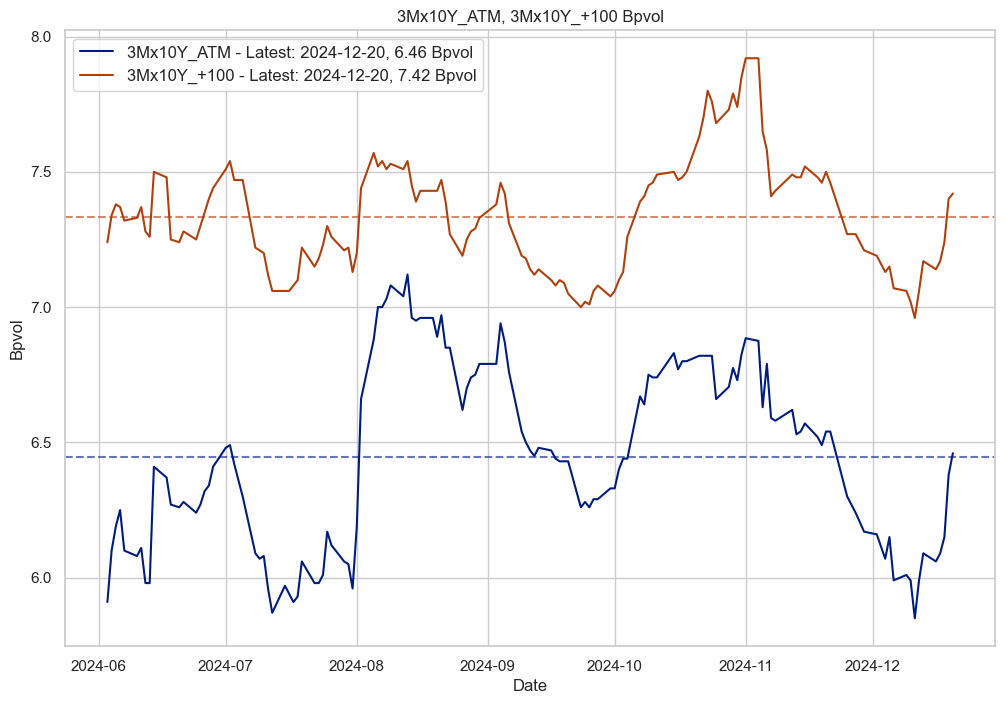

{'3Mx10Y_ATM':           Date  Normal Vol  Bpvol
 0   2024-06-03   93.818341   5.91
 1   2024-06-04   96.834498   6.10
 2   2024-06-05   98.263204   6.19
 3   2024-06-06   99.215674   6.25
 4   2024-06-07   96.834498   6.10
 ..         ...         ...    ...
 131 2024-12-16   96.199518   6.06
 132 2024-12-17   96.675753   6.09
 133 2024-12-18   97.628223   6.15
 134 2024-12-19  101.279360   6.38
 135 2024-12-20  102.549321   6.46
 
 [136 rows x 3 columns],
 '3Mx10Y_+100':           Date  Normal Vol     Bpvol
 0   2024-06-03  114.925910  7.239652
 1   2024-06-04  116.513388  7.339654
 2   2024-06-05  117.148368  7.379654
 3   2024-06-06  116.989605  7.369652
 4   2024-06-07  116.195916  7.319655
 ..         ...         ...       ...
 131 2024-12-16  113.338572  7.139659
 132 2024-12-17  113.814762  7.169656
 133 2024-12-18  114.926081  7.239663
 134 2024-12-19  117.466008  7.399663
 135 2024-12-20  117.783429  7.419659
 
 [136 rows x 3 columns]}

In [146]:
s490_swaptions.get_vol_timeseries(
    tenor_strike_pairs=[("3Mx10Y", 0), ("3Mx10Y", 100)], start_date=datetime(2024, 6, 1), end_date=datetime(2024, 12, 20), plot_timeseries=True
)